## Logistic regression

In [2]:
import matplotlib.pyplot as plt
import scipy.stats as stats
import numpy as np
import pandas as pd
import seaborn as sns
import pymc3 as pm
import arviz as az
from theano import shared

WARNING (theano.tensor.blas): Using NumPy C-API based implementation for BLAS functions.


Text(0, 0.5, 'logistic(z)')

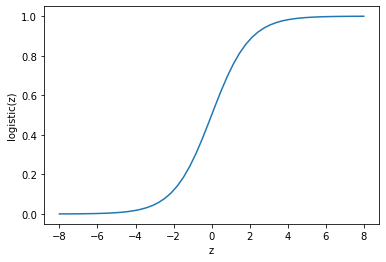

In [3]:
z = np.linspace(-8, 8)
plt.plot(z, 1 / (1 + np.exp(-z)))
plt.xlabel('z')
plt.ylabel('logistic(z)')

## Iris data

In [15]:
iris = pd.read_csv('C:/Users/kamguia_l/Documents/data/iris.csv')
iris.head()
iris.describecribe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


<AxesSubplot:xlabel='species', ylabel='sepal_length'>

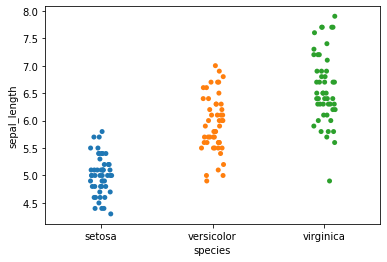

In [5]:
sns.stripplot(x="species", y="sepal_length", data=iris, jitter=True)

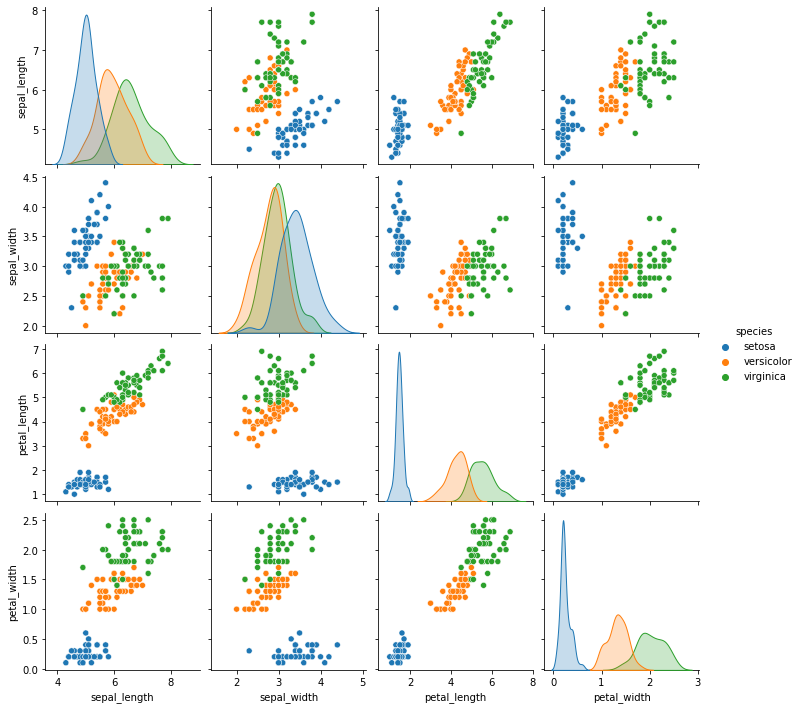

In [6]:
sns.pairplot(iris, hue='species', diag_kind='kde')

##     Logistic model applied to iris data

In [77]:
df = iris.query("species == ('setosa', 'versicolor')")
y_0 = pd.Categorical(df['species']).codes
x_n = 'sepal_length'
x_0 = df[x_n].values
x_c = x_0 - x_0.mean()
df.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,100.000000,100.000000,100.000000,100.000000
mean,5.471000,3.099000,2.861000,0.786000
std,0.641698,0.478739,1.449549,0.565153
min,4.300000,2.000000,1.000000,0.100000
25%,5.000000,2.800000,1.500000,0.200000
50%,5.400000,3.050000,2.450000,0.800000
75%,5.900000,3.400000,4.325000,1.300000
max,7.000000,4.400000,5.100000,1.800000


In [78]:
with pm.Model() as model_0:
    α = pm.Normal('α', mu=0, sd=10)
    β = pm.Normal('β', mu=0, sd=10)
    μ = α + pm.math.dot(x_c, β)
    θ = pm.Deterministic('θ', pm.math.sigmoid(μ))
    bd = pm.Deterministic('bd', -α/β)
    yl = pm.Bernoulli('yl', p=θ, observed=y_0)
    trace_0 = pm.sample(1000)

C:\Users\KAMGUI~1\AppData\Local\Temp/ipykernel_25120/881117480.py:8: FutureWarning: In v4.0, pm.sample will return an `arviz.InferenceData` object instead of a `MultiTrace` by default. You can pass return_inferencedata=True or return_inferencedata=False to be safe and silence this warning.
  trace_0 = pm.sample(1000)
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [β, α]


Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 34 seconds.


In [13]:
az.summary(trace_0)

D:\Anaconda\lib\site-packages\arviz\data\io_pymc3.py:96: FutureWarning: Using `from_pymc3` without the model will be deprecated in a future release. Not using the model will return less accurate and less useful results. Make sure you use the model argument or call from_pymc3 within a model context.
  warnings.warn(


,mean,sd,hdi_3%,hdi_97%,mcse_mean,mcse_sd,ess_bulk,ess_tail,r_hat
α,0.296,0.340,-0.316,0.952,0.006,0.005,2922.0,2336.0,1.0
β,5.372,1.040,3.444,7.248,0.020,0.014,2825.0,2397.0,1.0
θ[0],0.163,0.057,0.066,0.273,0.001,0.001,3189.0,2861.0,1.0
θ[1],0.067,0.035,0.011,0.131,0.001,0.000,3161.0,2624.0,1.0
θ[2],0.027,0.019,0.002,0.063,0.000,0.000,3082.0,2517.0,1.0
...,...,...,...,...,...,...,...,...,...
θ[96],0.812,0.067,0.687,0.930,0.001,0.001,2723.0,2418.0,1.0
θ[97],0.979,0.018,0.947,0.999,0.000,0.000,2694.0,2445.0,1.0
θ[98],0.163,0.057,0.066,0.273,0.001,0.001,3189.0,2861.0,1.0
θ[99],0.812,0.067,0.687,0.930,0.001,0.001,2723.0,2418.0,1.0


D:\Anaconda\lib\site-packages\arviz\stats\stats.py:456: FutureWarning: hdi currently interprets 2d data as (draw, shape) but this will change in a future release to (chain, draw) for coherence with other functions
  warnings.warn(


([<matplotlib.axis.XTick at 0x12a31561340>,
 [Text(-1.5, 0, '4.0'),
  Text(-1.0, 0, '4.5'),
  Text(-0.5, 0, '5.0'),
  Text(0.0, 0, '5.5'),
  Text(0.5, 0, '6.0'),
  Text(1.0, 0, '6.5'),
  Text(1.5, 0, '7.0'),
  Text(2.0, 0, '7.5')])

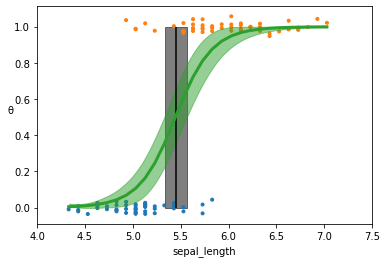

In [19]:
theta = trace_0['θ'].mean(axis=0)
idx = np.argsort(x_c) # argsort give the sort indices
plt.plot(x_c[idx], theta[idx], color='C2', lw=3) # courbe sigmoide
plt.vlines(trace_0['bd'].mean(), 0, 1, color='k') # droite verticale entre 0 et 1
bd_hpd = az.hdi(trace_0['bd']) # interval credival
plt.fill_betweenx([0, 1], bd_hpd[0], bd_hpd[1], color='k', alpha=0.5) # fill between (0 bd0) (1 bd1)
plt.scatter(x_c, np.random.normal(y_0, 0.02), marker='.', color=[f'C{x}' for x in y_0])
az.plot_hdi(x_c, trace_0['θ'], color='C2') # courbure autour de fonction sigsmoid
plt.xlabel(x_n)
plt.ylabel('θ', rotation=0)
# use original scale for xticks
locs, _ = plt.xticks()
plt.xticks(locs, np.round(locs + x_0.mean(), 1))

### Multiple logistic regression

In [43]:
df = iris.query("species == ('setosa', 'versicolor')")
y_1 = pd.Categorical(df['species']).codes
x_n = ['sepal_length', 'sepal_width']
x_1 = df[x_n].values

In [44]:
with pm.Model() as model_1:
    α = pm.Normal('α', mu=0, sd=10)
    β = pm.Normal('β', mu=0, sd=2, shape=len(x_n))
    μ = α + pm.math.dot(x_1, β)
    θ = pm.Deterministic('θ', 1 / (1 + pm.math.exp(-μ)))
    bd = pm.Deterministic('bd', -α/β[1] - β[0]/β[1] * x_1[:,0])
    yl = pm.Bernoulli('yl', p=θ, observed=y_1)
    trace_1 = pm.sample(2000)

C:\Users\KAMGUI~1\AppData\Local\Temp/ipykernel_25120/260595563.py:8: FutureWarning: In v4.0, pm.sample will return an `arviz.InferenceData` object instead of a `MultiTrace` by default. You can pass return_inferencedata=True or return_inferencedata=False to be safe and silence this warning.
  trace_1 = pm.sample(2000)
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [β, α]


Sampling 4 chains for 1_000 tune and 2_000 draw iterations (4_000 + 8_000 draws total) took 122 seconds.
The acceptance probability does not match the target. It is 0.8950459455383106, but should be close to 0.8. Try to increase the number of tuning steps.
There were 9 divergences after tuning. Increase `target_accept` or reparameterize.
The number of effective samples is smaller than 10% for some parameters.


D:\Anaconda\lib\site-packages\arviz\stats\stats.py:456: FutureWarning: hdi currently interprets 2d data as (draw, shape) but this will change in a future release to (chain, draw) for coherence with other functions
  warnings.warn(


Text(0, 0.5, 'sepal_width')

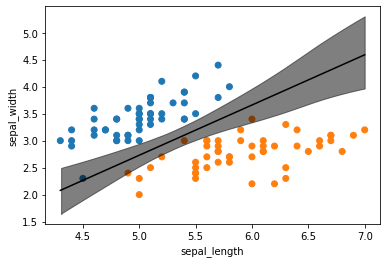

In [45]:
idx = np.argsort(x_1[:,0])
bd = trace_1['bd'].mean(0)[idx]
plt.scatter(x_1[:,0], x_1[:,1], c=[f'C{x}' for x in y_0])
plt.plot(x_1[:,0][idx], bd, color='k');
az.plot_hdi(x_1[:,0], trace_1['bd'], color='k')
plt.xlabel(x_n[0])
plt.ylabel(x_n[1])

C:\Users\KAMGUI~1\AppData\Local\Temp/ipykernel_25120/637457858.py:2: RuntimeWarning: divide by zero encountered in true_divide
  odds = probability / (1 - probability)


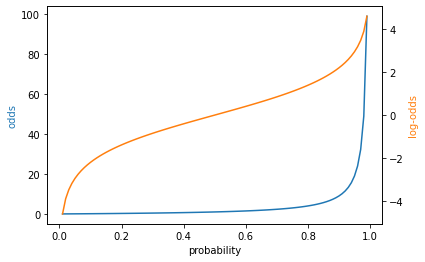

In [46]:
probability = np.linspace(0.01, 1, 100)
odds = probability / (1 - probability)
_, ax1 = plt.subplots()
ax2 = ax1.twinx()
ax1.plot(probability, odds, 'C0')
ax2.plot(probability, np.log(odds), 'C1')
ax1.set_xlabel('probability')
ax1.set_ylabel('odds', color='C0')
ax2.set_ylabel('log-odds', color='C1')
ax1.grid(False)
ax2.grid(False)

In [49]:
varnames = ['α', 'β']
df = az.summary(trace_1, var_names=varnames)
df

D:\Anaconda\lib\site-packages\arviz\data\io_pymc3.py:96: FutureWarning: Using `from_pymc3` without the model will be deprecated in a future release. Not using the model will return less accurate and less useful results. Make sure you use the model argument or call from_pymc3 within a model context.
  warnings.warn(


,mean,sd,hdi_3%,hdi_97%,mcse_mean,mcse_sd,ess_bulk,ess_tail,r_hat
α,-9.248,4.630,-17.612,-0.428,0.108,0.076,1813.0,2289.0,1.00
β[0],4.678,0.874,3.128,6.388,0.030,0.021,703.0,248.0,1.00
β[1],-5.163,1.009,-6.950,-3.243,0.026,0.018,1389.0,854.0,1.01


In [50]:
x_1 = 4.5 # sepal_length
x_2 = 3 # sepal_width
log_odds_versicolor_i = (df['mean'] * [1, x_1, x_2]).sum()
probability_versicolor_i = logistic(log_odds_versicolor_i)
log_odds_versicolor_f = (df['mean'] * [1, x_1 + 1, x_2]).sum()
probability_versicolor_f = logistic(log_odds_versicolor_f)
log_odds_versicolor_f - log_odds_versicolor_i, probability_versicolor_f - probability_versicolor_i

NameError: name 'logistic' is not defined

### Dealing with correlated variables

<AxesSubplot:>

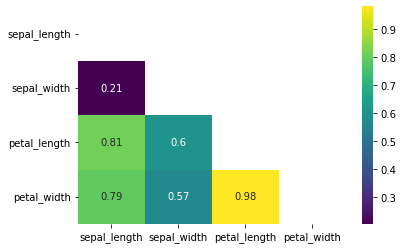

In [30]:
corr = iris[iris['species'] != 'virginica'].corr()
mask = np.tri(*corr.shape).T
sns.heatmap(corr.abs(), mask=mask, annot=True, cmap='viridis')

### Dealing with unbalanced

In [35]:
df = iris.query("species == ('setosa', 'versicolor')")
df = df[45:]
y_3 = pd.Categorical(df['species']).codes
x_n = ['sepal_length', 'sepal_width']
x_3 = df[x_n].values

In [36]:
with pm.Model() as model_3:
    α = pm.Normal('α', mu=0, sd=10)
    β = pm.Normal('β', mu=0, sd=2, shape=len(x_n))
    μ = α + pm.math.dot(x_3, β)
    θ = 1 / (1 + pm.math.exp(-μ))
    bd = pm.Deterministic('bd', -α/β[1] - β[0]/β[1] * x_3[:,0])
    yl = pm.Bernoulli('yl', p=θ, observed=y_3)
    trace_3 = pm.sample(1000)

C:\Users\KAMGUI~1\AppData\Local\Temp/ipykernel_25120/924371575.py:8: FutureWarning: In v4.0, pm.sample will return an `arviz.InferenceData` object instead of a `MultiTrace` by default. You can pass return_inferencedata=True or return_inferencedata=False to be safe and silence this warning.
  trace_3 = pm.sample(1000)
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [β, α]


Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 90 seconds.
There was 1 divergence after tuning. Increase `target_accept` or reparameterize.
The acceptance probability does not match the target. It is 0.8905210813615158, but should be close to 0.8. Try to increase the number of tuning steps.
There were 3 divergences after tuning. Increase `target_accept` or reparameterize.
There were 5 divergences after tuning. Increase `target_accept` or reparameterize.
There were 23 divergences after tuning. Increase `target_accept` or reparameterize.
The number of effective samples is smaller than 25% for some parameters.


D:\Anaconda\lib\site-packages\arviz\stats\stats.py:456: FutureWarning: hdi currently interprets 2d data as (draw, shape) but this will change in a future release to (chain, draw) for coherence with other functions
  warnings.warn(


Text(0, 0.5, 'sepal_width')

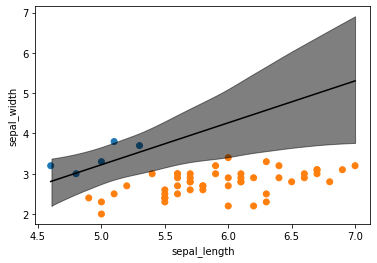

In [37]:
idx = np.argsort(x_3[:,0])
bd = trace_3['bd'].mean(0)[idx]
plt.scatter(x_3[:,0], x_3[:,1], c= [f'C{x}' for x in y_3])
plt.plot(x_3[:,0][idx], bd, color='k')
az.plot_hdi(x_3[:,0], trace_3['bd'], color='k')
plt.xlabel(x_n[0])
plt.ylabel(x_n[1])

## Softmax regression

In [3]:
iris = sns.load_dataset('iris')
y_s = pd.Categorical(iris['species']).codes # variables items codes
x_n = iris.columns[:-1]  # get the list of columns names and remove the last one which is the target variable
x_s = iris[x_n].values
x_s = (x_s - x_s.mean(axis=0)) / x_s.std(axis=0) # standardise each column

In [18]:
iris[x_n].values.mean(axis=0)

array([5.84333333, 3.05733333, 3.758     , 1.19933333])

In [13]:
x_s

array([[-9.00681170e-01,  1.01900435e+00, -1.34022653e+00,
        -1.31544430e+00],
       [-1.14301691e+00, -1.31979479e-01, -1.34022653e+00,
        -1.31544430e+00],
       [-1.38535265e+00,  3.28414053e-01, -1.39706395e+00,
        -1.31544430e+00],
       [-1.50652052e+00,  9.82172869e-02, -1.28338910e+00,
        -1.31544430e+00],
       [-1.02184904e+00,  1.24920112e+00, -1.34022653e+00,
        -1.31544430e+00],
       [-5.37177559e-01,  1.93979142e+00, -1.16971425e+00,
        -1.05217993e+00],
       [-1.50652052e+00,  7.88807586e-01, -1.34022653e+00,
        -1.18381211e+00],
       [-1.02184904e+00,  7.88807586e-01, -1.28338910e+00,
        -1.31544430e+00],
       [-1.74885626e+00, -3.62176246e-01, -1.34022653e+00,
        -1.31544430e+00],
       [-1.14301691e+00,  9.82172869e-02, -1.28338910e+00,
        -1.44707648e+00],
       [-5.37177559e-01,  1.47939788e+00, -1.28338910e+00,
        -1.31544430e+00],
       [-1.26418478e+00,  7.88807586e-01, -1.22655167e+00,
      

In [4]:
import theano.tensor as tt
with pm.Model() as model_s:
    α = pm.Normal('α', mu=0, sd=5, shape=3) # 3 items for output
    β = pm.Normal('β', mu=0, sd=5, shape=(4,3)) # 4 variable independent and 1 dependant variable with 3 items
    μ = pm.Deterministic('μ', α + pm.math.dot(x_s, β))
    θ = tt.nnet.softmax(μ)
    yl = pm.Categorical('yl', p=θ, observed=y_s) # generalisation of bernouilli
    trace_s = pm.sample(2000)

C:\Users\KAMGUI~1\AppData\Local\Temp/ipykernel_25120/1056887113.py:8: FutureWarning: In v4.0, pm.sample will return an `arviz.InferenceData` object instead of a `MultiTrace` by default. You can pass return_inferencedata=True or return_inferencedata=False to be safe and silence this warning.
  trace_s = pm.sample(2000)
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [β, α]


Sampling 4 chains for 1_000 tune and 2_000 draw iterations (4_000 + 8_000 draws total) took 174 seconds.
There were 42 divergences after tuning. Increase `target_accept` or reparameterize.
There were 11 divergences after tuning. Increase `target_accept` or reparameterize.
There were 10 divergences after tuning. Increase `target_accept` or reparameterize.


In [5]:
data_pred = trace_s['μ'].mean(0) # get the posterior with 150 rows (samples) and 3 columns (species)
y_pred = [np.exp(point)/np.sum(np.exp(point), axis=0) for point in data_pred] # calculate the softmax np.exp(point)/np.sum(np.exp(point), axis=0)
f'{np.sum(y_s == np.argmax(y_pred, axis=1)) / len(y_s):.2f}' # compare prediction np.argmax(y_pred, axis=1 ) with actual y_s

'0.98'

In [24]:
data_pred.shape

(150, 3)

In [29]:
for point in data_pred:
    print(point)
    print(np.exp(point))
    print(np.sum(np.exp(point), axis=0))

[ 20.34220489   6.371688   -26.97295202]
[6.83136250e+08 5.85044551e+02 1.93106004e-12]
683136835.1780359
[ 17.28856309   6.9825589  -24.41004151]
[3.22349907e+07 1.07767250e+03 2.50526500e-11]
32236068.405859802
[ 19.75601912   6.1567588  -26.07171165]
[3.80128198e+08 4.71896083e+02 4.75553623e-12]
380128669.61838764
[ 18.62863416   5.98258467 -24.71807076]
[1.23115582e+08 3.96463773e+02 1.84110376e-11]
123115978.20074125
[ 21.39897822   5.92000535 -27.58307192]
[1.96543261e+09 3.72413707e+02 1.04911736e-12]
1965432984.998712
[ 19.78064638   5.71002895 -25.81448566]
[3.89605943e+08 3.01879807e+02 6.15051277e-12]
389606244.90933526
[ 20.44870343   5.27630389 -25.88736829]
[7.59904577e+08 1.95645411e+02 5.71819289e-12]
759904772.5344609
[ 19.56872929   6.27507907 -26.06074148]
[3.15203586e+08 5.31168378e+02 4.80799251e-12]
315204117.4608245
[ 18.14341107   6.0220624  -24.21794073]
[7.57850096e+07 4.12428310e+02 3.03586165e-11]
75785422.00592807
[ 18.42117294   6.82356185 -25.40254416]
[

71814.15299278633
[-16.81640077   6.23707267  10.71298856]
[4.97427672e-08 5.11359401e+02 4.49357316e+04]
45447.09102246564
[-12.33613201   5.67950094   6.88092598]
[4.39021654e-06 2.92803267e+02 9.73527405e+02]
1266.3306765302277
[-10.89509826   4.93393364   6.17178638]
[1.85489336e-05 1.38924919e+02 4.79041094e+02]
617.9660315024818
[-18.04966233   5.12504294  13.23215737]
[1.44920976e-08 1.68181363e+02 5.58024067e+05]
558192.2485183019
[-16.08822272   7.09461719   9.12406203]
[1.03032360e-07 1.20546081e+03 9.17338862e+03]
10378.849432770905
[-21.50854579   7.36062408  14.34904176]
[4.55992027e-10 1.57281782e+03 1.70494218e+06]
1706514.9998313684
[-17.52994328   6.00666228  11.5106646 ]
[2.43692613e-08 4.06125521e+02 9.97741689e+04]
100180.29443501822
[-18.79801177   4.99015533  14.12564033]
[6.85689056e-09 1.46959249e+02 1.36360206e+06]
1363749.019013087
[-11.47141534   6.08683136   5.59443801]
[1.04238372e-05 4.40024918e+02 2.68926474e+02]
708.9514020911216
[-13.33174517   5.795805

In [15]:
y_pred

[array([9.99999144e-01, 8.56409024e-07, 2.82675438e-21]),
 array([9.99966569e-01, 3.34306431e-05, 7.77162080e-19]),
 array([9.99998759e-01, 1.24141145e-06, 1.25103330e-20]),
 array([9.99996780e-01, 3.22024630e-06, 1.49542227e-19]),
 array([9.99999811e-01, 1.89481763e-07, 5.33784345e-22]),
 array([9.99999225e-01, 7.74833080e-07, 1.57864840e-20]),
 array([9.99999743e-01, 2.57460432e-07, 7.52488088e-21]),
 array([9.99998315e-01, 1.68515685e-06, 1.52535841e-20]),
 array([9.99994558e-01, 5.44205336e-06, 4.00586494e-19]),
 array([9.99990812e-01, 9.18792643e-06, 9.28105821e-20]),
 array([9.99999118e-01, 8.81842962e-07, 1.55589268e-21]),
 array([9.99999266e-01, 7.33645218e-07, 1.55429685e-20]),
 array([9.99989597e-01, 1.04027208e-05, 1.02060539e-19]),
 array([9.99999715e-01, 2.84566386e-07, 1.34741790e-21]),
 array([9.99999799e-01, 2.01417816e-07, 1.45999838e-23]),
 array([9.99999980e-01, 1.98740348e-08, 1.72524099e-23]),
 array([9.99999743e-01, 2.56536634e-07, 6.55600147e-22]),
 array([9.9999

In [30]:
np.argmax(y_pred, axis=1)

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2], dtype=int64)

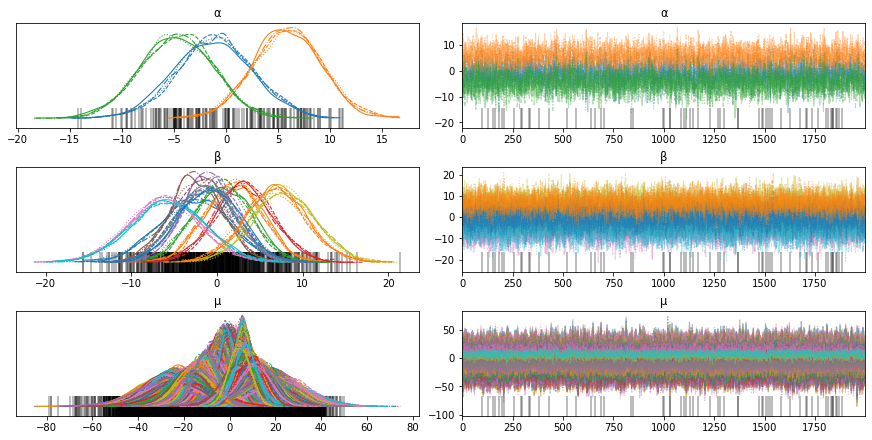

In [21]:
with model_s:
    az.plot_trace(trace_s)

In [33]:
with model_s:
    s_sum = az.summary(trace_s)
s_sum

,mean,sd,hdi_3%,hdi_97%,mcse_mean,mcse_sd,ess_bulk,ess_tail,r_hat
α[0],-1.117,3.691,-8.005,5.823,0.062,0.044,3545.0,4312.0,1.0
α[1],5.902,3.243,-0.382,11.710,0.058,0.041,3153.0,3862.0,1.0
α[2],-4.725,3.477,-11.415,1.585,0.061,0.043,3237.0,3408.0,1.0
"β[0,0]",-2.629,4.144,-10.211,5.207,0.066,0.052,3919.0,3985.0,1.0
"β[0,1]",1.942,3.318,-4.298,7.935,0.060,0.043,3040.0,3143.0,1.0
...,...,...,...,...,...,...,...,...,...
"μ[148,1]",3.242,6.908,-10.300,15.580,0.128,0.091,2910.0,3918.0,1.0
"μ[148,2]",10.754,6.939,-2.444,23.701,0.129,0.091,2904.0,4024.0,1.0
"μ[149,0]",-10.966,5.510,-20.808,-0.280,0.086,0.061,4102.0,4782.0,1.0
"μ[149,1]",4.308,4.643,-4.585,12.701,0.085,0.062,2999.0,3753.0,1.0


In [6]:
# to correct non identifiability problem due to corrolated data
# we will fix n-1 parameter and deduce the last one

with pm.Model() as model_sf:
    α = pm.Normal('α', mu=0, sd=2, shape=2)
    β = pm.Normal('β', mu=0, sd=2, shape=(4,2))
    α_f = tt.concatenate([[0] ,α])
    β_f = tt.concatenate([np.zeros((4,1)) , β], axis=1)
    μ = α_f + pm.math.dot(x_s, β_f)
    θ = tt.nnet.softmax(μ)
    yl = pm.Categorical('yl', p=θ, observed=y_s)
    trace_sf = pm.sample(1000)

C:\Users\KAMGUI~1\AppData\Local\Temp/ipykernel_25120/862970333.py:9: FutureWarning: In v4.0, pm.sample will return an `arviz.InferenceData` object instead of a `MultiTrace` by default. You can pass return_inferencedata=True or return_inferencedata=False to be safe and silence this warning.
  trace_sf = pm.sample(1000)
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [β, α]


Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 112 seconds.


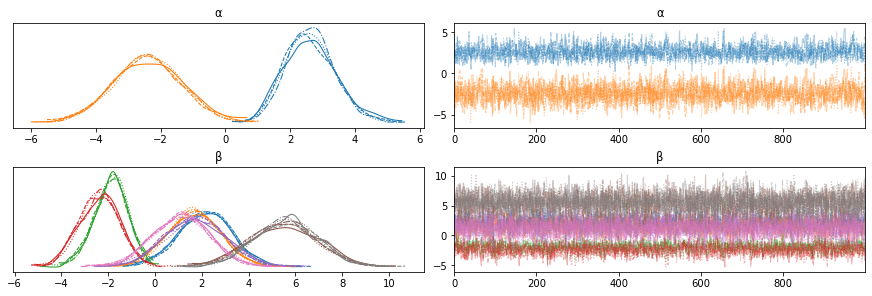

In [31]:
with model_sf:
    az.plot_trace(trace_sf)

In [32]:
with model_sf:
    sf_sum = az.summary(trace_sf)
sf_sum

,mean,sd,hdi_3%,hdi_97%,mcse_mean,mcse_sd,ess_bulk,ess_tail,r_hat
α[0],2.630,0.786,1.207,4.118,0.017,0.012,2152.0,2181.0,1.0
α[1],-2.398,1.071,-4.405,-0.370,0.023,0.016,2185.0,1784.0,1.0
"β[0,0]",2.156,1.138,-0.029,4.277,0.027,0.019,1802.0,2125.0,1.0
"β[0,1]",1.666,1.159,-0.557,3.791,0.027,0.019,1854.0,2280.0,1.0
"β[1,0]",-1.881,0.718,-3.202,-0.486,0.017,0.012,1909.0,1747.0,1.0
"β[1,1]",-2.388,0.861,-4.009,-0.829,0.020,0.014,1964.0,2097.0,1.0
"β[2,0]",1.724,1.314,-0.636,4.240,0.029,0.021,2043.0,2387.0,1.0
"β[2,1]",5.470,1.462,2.752,8.175,0.030,0.021,2370.0,2654.0,1.0
"β[3,0]",1.115,1.240,-1.147,3.461,0.029,0.020,1892.0,2200.0,1.0
"β[3,1]",5.622,1.370,2.946,8.045,0.028,0.020,2341.0,2157.0,1.0


### LDA linear discriminant analysis (LDA).

In [39]:
with pm.Model() as lda:
    μ = pm.Normal('μ', mu=0, sd=10, shape=2)
    σ = pm.HalfNormal('σ', 10)
    setosa = pm.Normal('setosa', mu=μ[0], sd=σ, observed=x_0[:50])
    versicolor = pm.Normal('versicolor', mu=μ[1], sd=σ,  observed=x_0[50:])
    bd = pm.Deterministic('bd', (μ[0] + μ[1]) / 2)
    trace_lda = pm.sample(1000)

C:\Users\KAMGUI~1\AppData\Local\Temp/ipykernel_25120/490916901.py:7: FutureWarning: In v4.0, pm.sample will return an `arviz.InferenceData` object instead of a `MultiTrace` by default. You can pass return_inferencedata=True or return_inferencedata=False to be safe and silence this warning.
  trace_lda = pm.sample(1000)
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [σ, μ]


Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 80 seconds.


Text(0.5, 0, 'sepal_length')

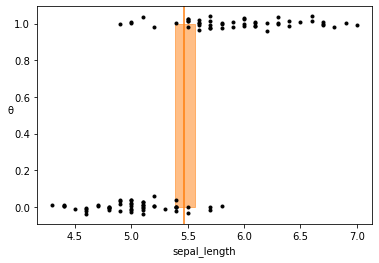

In [40]:
plt.axvline(trace_lda['bd'].mean(), ymax=1, color='C1')
bd_hpd = az.hdi(trace_lda['bd'])
plt.fill_betweenx([0, 1], bd_hpd[0], bd_hpd[1], color='C1', alpha=0.5)
plt.plot(x_0, np.random.normal(y_0, 0.02), '.', color='k')
plt.ylabel('θ', rotation=0)
plt.xlabel('sepal_length')

In [41]:
az.summary(trace_lda)

D:\Anaconda\lib\site-packages\arviz\data\io_pymc3.py:96: FutureWarning: Using `from_pymc3` without the model will be deprecated in a future release. Not using the model will return less accurate and less useful results. Make sure you use the model argument or call from_pymc3 within a model context.
  warnings.warn(


,mean,sd,hdi_3%,hdi_97%,mcse_mean,mcse_sd,ess_bulk,ess_tail,r_hat
μ[0],5.007,0.064,4.888,5.124,0.001,0.001,5506.0,3218.0,1.0
μ[1],5.936,0.065,5.819,6.060,0.001,0.001,5033.0,2701.0,1.0
σ,0.447,0.033,0.390,0.511,0.001,0.000,4316.0,2780.0,1.0
bd,5.471,0.047,5.388,5.561,0.001,0.000,5048.0,2634.0,1.0


### Poisson regression

Text(0, 0.5, 'f(x)')

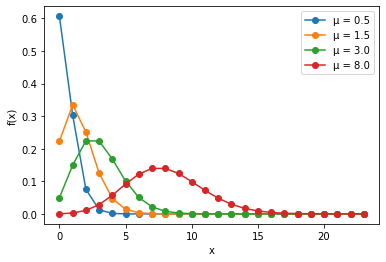

In [54]:
mu_params = [0.5, 1.5, 3, 8]
x = np.arange(0, max(mu_params) * 3)
for mu in mu_params:
    y = stats.poisson(mu).pmf(x)
    plt.plot(x, y, 'o-', label=f'μ = {mu:3.1f}')
plt.legend()
plt.xlabel('x')
plt.ylabel('f(x)')

### The zero-inflated Poisson model

In [56]:
help(tt.nnet)

Help on package theano.tensor.nnet in theano.tensor:

NAME
    theano.tensor.nnet

PACKAGE CONTENTS
    abstract_conv
    blocksparse
    bn
    conv
    conv3d2d
    corr
    corr3d
    ctc
    neighbours
    nnet
    opt
    sigm
    tests (package)

FUNCTIONS
    conv2d(input, filters, input_shape=None, filter_shape=None, border_mode='valid', subsample=(1, 1), filter_flip=True, image_shape=None, filter_dilation=(1, 1), num_groups=1, unshared=False, **kwargs)
        This function will build the symbolic graph for convolving a mini-batch of a
        stack of 2D inputs with a set of 2D filters. The implementation is modelled
        after Convolutional Neural Networks (CNN).
        
        
        Parameters
        ----------
        input: symbolic 4D tensor
            Mini-batch of feature map stacks, of shape
            (batch size, input channels, input rows, input columns).
            See the optional parameter ``input_shape``.
        
        filters: symbolic 4D or 6D 

In [57]:
n = 100
θ_real = 2.5
ψ = 0.1
# Simulate some data
counts = np.array([(np.random.random() > (1-ψ)) * np.random.poisson(θ_real) for i in range(n)])

In [58]:
counts

array([0, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 5,
       2, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 5, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0])

In [61]:
with pm.Model() as ZIP:
    ψ = pm.Beta('ψ', 1, 1)
    θ = pm.Gamma('θ', 2, 0.1)
    y = pm.ZeroInflatedPoisson('y', ψ, θ, observed=counts)
    trace_zip = pm.sample(1000)

C:\Users\KAMGUI~1\AppData\Local\Temp/ipykernel_25120/1054358579.py:5: FutureWarning: In v4.0, pm.sample will return an `arviz.InferenceData` object instead of a `MultiTrace` by default. You can pass return_inferencedata=True or return_inferencedata=False to be safe and silence this warning.
  trace_zip = pm.sample(1000)
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [θ, ψ]


Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 34 seconds.
The acceptance probability does not match the target. It is 0.8906209088403125, but should be close to 0.8. Try to increase the number of tuning steps.


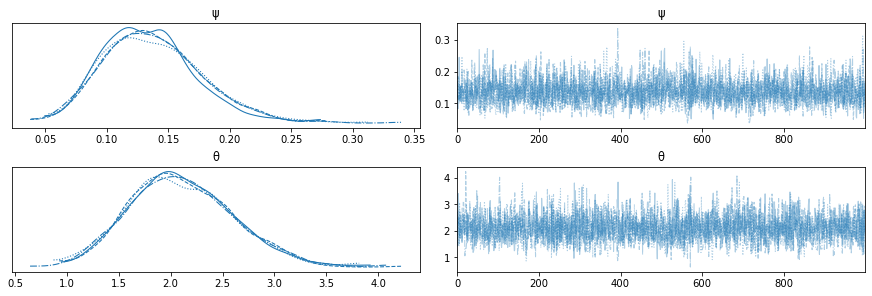

In [62]:
with ZIP:
    az.plot_trace(trace_zip)

In [64]:
fish_data = pd.read_csv('C:/Users/kamguia_l/Documents/data/fish.csv')
fish_data.head()
fish_data.describe()

,nofish,livebait,camper,persons,child,xb,zg,count
count,250.000000,250.000000,250.000000,250.00000,250.000000,250.000000,250.000000,250.000000
mean,0.296000,0.864000,0.588000,2.52800,0.684000,0.973796,0.252323,3.296000
std,0.457407,0.343476,0.493182,1.11273,0.850315,1.440277,2.102391,11.635028
min,0.000000,0.000000,0.000000,1.00000,0.000000,-3.275050,-5.625944,0.000000
25%,0.000000,1.000000,0.000000,2.00000,0.000000,0.008267,-1.252724,0.000000
50%,0.000000,1.000000,1.000000,2.00000,0.000000,0.954550,0.605079,0.000000
75%,1.000000,1.000000,1.000000,4.00000,1.000000,1.963855,1.993237,2.000000
max,1.000000,1.000000,1.000000,4.00000,3.000000,5.352674,4.263185,149.000000


<AxesSubplot:xlabel='camper', ylabel='count'>

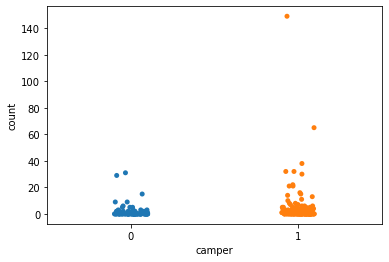

In [65]:
sns.stripplot(x="camper", y="count", data=fish_data, jitter=True)

<AxesSubplot:xlabel='camper', ylabel='count'>

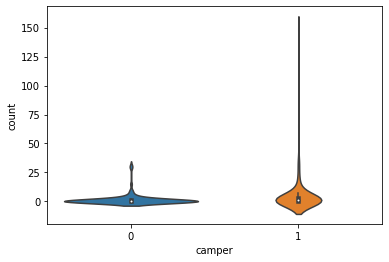

In [68]:
sns.violinplot(x="camper", y="count", data=fish_data)

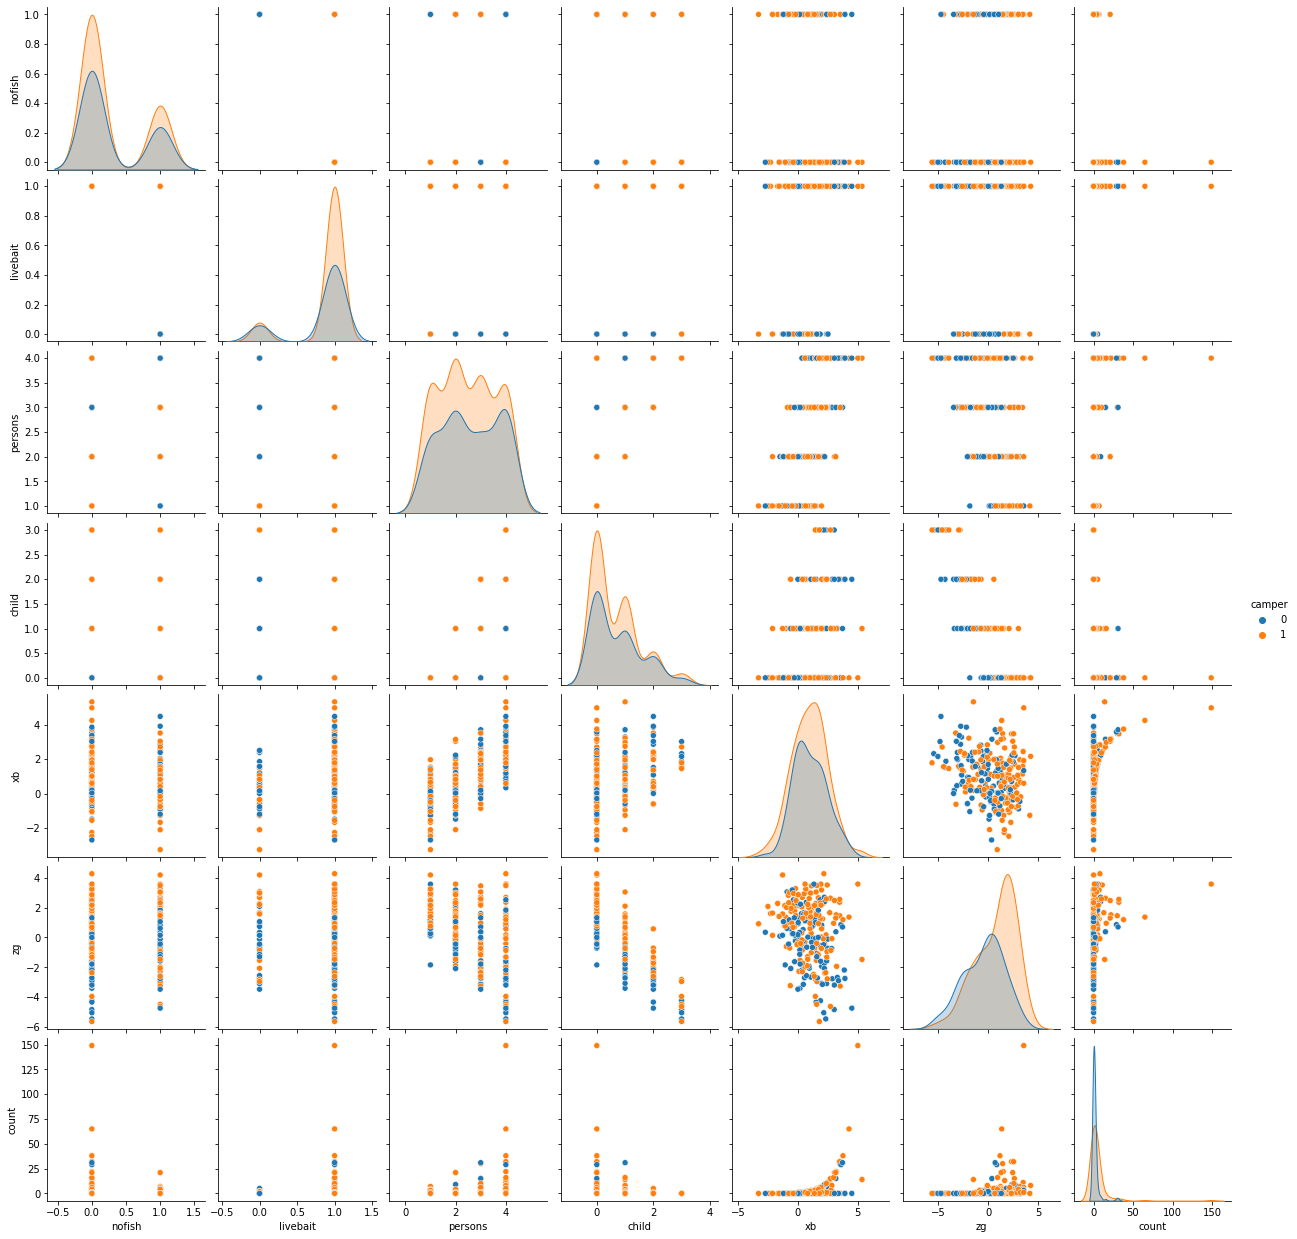

In [69]:
sns.pairplot(fish_data, hue="camper")

In [70]:
with pm.Model() as ZIP_reg:
    ψ = pm.Beta('ψ', 1, 1)
    α = pm.Normal('α', 0, 10)
    β = pm.Normal('β', 0, 10, shape=2)
    θ = pm.math.exp(α + β[0] * fish_data['child'] + β[1] *
    fish_data['camper'])
    yl = pm.ZeroInflatedPoisson('yl', ψ, θ, observed=fish_data['count'])
    trace_ZIP_reg = pm.sample(1000)

C:\Users\KAMGUI~1\AppData\Local\Temp/ipykernel_25120/2700750080.py:8: FutureWarning: In v4.0, pm.sample will return an `arviz.InferenceData` object instead of a `MultiTrace` by default. You can pass return_inferencedata=True or return_inferencedata=False to be safe and silence this warning.
  trace_ZIP_reg = pm.sample(1000)
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [β, α, ψ]


Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 41 seconds.


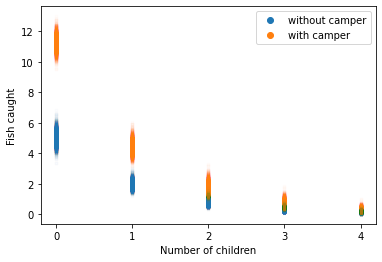

In [72]:
children = [0, 1, 2, 3, 4]
fish_count_pred_0 = []
fish_count_pred_1 = []
for n in children:
    without_camper = trace_ZIP_reg['α'] + trace_ZIP_reg['β'][:,0] * n
    with_camper = without_camper + trace_ZIP_reg['β'][:,1]
    fish_count_pred_0.append(np.exp(without_camper))
    fish_count_pred_1.append(np.exp(with_camper))
plt.plot(children, fish_count_pred_0, 'C0.', alpha=0.01)
plt.plot(children, fish_count_pred_1, 'C1.', alpha=0.01)
plt.xticks(children);
plt.xlabel('Number of children')
plt.ylabel('Fish caught')
plt.plot([], 'C0o', label='without camper')
plt.plot([], 'C1o', label='with camper')
plt.legend()

###  Robust logistic regression

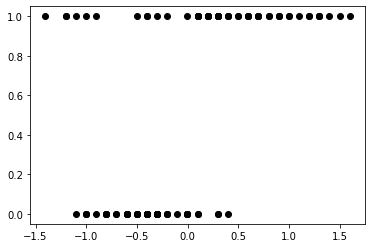

In [73]:
iris = sns.load_dataset("iris")
df = iris.query("species == ('setosa', 'versicolor')")
y_0 = pd.Categorical(df['species']).codes
x_n = 'sepal_length'
x_0 = df[x_n].values
y_0 = np.concatenate((y_0, np.ones(6, dtype=int)))
x_0 = np.concatenate((x_0, [4.2, 4.5, 4.0, 4.3, 4.2, 4.4]))
x_c = x_0 - x_0.mean()
plt.plot(x_c, y_0, 'o', color='k');

In [74]:
with pm.Model() as model_rlg:
    α = pm.Normal('α', mu=0, sd=10)
    β = pm.Normal('β', mu=0, sd=10)
    μ = α + x_c * β
    θ = pm.Deterministic('θ', pm.math.sigmoid(μ))
    bd = pm.Deterministic('bd', -α/β)
    π = pm.Beta('π', 1., 1.)
    p = π * 0.5 + (1 - π) * θ
    yl = pm.Bernoulli('yl', p=p, observed=y_0)
    trace_rlg = pm.sample(1000)

C:\Users\KAMGUI~1\AppData\Local\Temp/ipykernel_25120/3159085531.py:10: FutureWarning: In v4.0, pm.sample will return an `arviz.InferenceData` object instead of a `MultiTrace` by default. You can pass return_inferencedata=True or return_inferencedata=False to be safe and silence this warning.
  trace_rlg = pm.sample(1000)
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [π, β, α]


Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 33 seconds.
There were 13 divergences after tuning. Increase `target_accept` or reparameterize.
There were 15 divergences after tuning. Increase `target_accept` or reparameterize.
There were 6 divergences after tuning. Increase `target_accept` or reparameterize.
There were 8 divergences after tuning. Increase `target_accept` or reparameterize.


In [76]:
az.summary(trace_rlg)

D:\Anaconda\lib\site-packages\arviz\data\io_pymc3.py:96: FutureWarning: Using `from_pymc3` without the model will be deprecated in a future release. Not using the model will return less accurate and less useful results. Make sure you use the model argument or call from_pymc3 within a model context.
  warnings.warn(


,mean,sd,hdi_3%,hdi_97%,mcse_mean,mcse_sd,ess_bulk,ess_tail,r_hat
α,-0.816,0.904,-2.526,0.805,0.021,0.015,1868.0,2144.0,1.0
β,15.872,6.196,5.625,27.133,0.155,0.111,1664.0,1937.0,1.0
θ[0],0.021,0.040,0.000,0.089,0.001,0.001,1551.0,2120.0,1.0
θ[1],0.005,0.013,0.000,0.021,0.000,0.000,1566.0,2042.0,1.0
θ[2],0.001,0.005,0.000,0.005,0.000,0.000,1582.0,1897.0,1.0
...,...,...,...,...,...,...,...,...,...
θ[103],0.000,0.001,0.000,0.000,0.000,0.000,1604.0,1893.0,1.0
θ[104],0.000,0.000,0.000,0.000,0.000,0.000,1609.0,1882.0,1.0
θ[105],0.000,0.001,0.000,0.001,0.000,0.000,1600.0,1866.0,1.0
bd,0.048,0.056,-0.059,0.154,0.001,0.001,2431.0,2255.0,1.0


In [79]:
az.summary(trace_0)

D:\Anaconda\lib\site-packages\arviz\data\io_pymc3.py:96: FutureWarning: Using `from_pymc3` without the model will be deprecated in a future release. Not using the model will return less accurate and less useful results. Make sure you use the model argument or call from_pymc3 within a model context.
  warnings.warn(


,mean,sd,hdi_3%,hdi_97%,mcse_mean,mcse_sd,ess_bulk,ess_tail,r_hat
α,0.306,0.340,-0.314,0.960,0.007,0.005,2565.0,1995.0,1.0
β,5.385,1.054,3.517,7.400,0.021,0.015,2676.0,2251.0,1.0
θ[0],0.164,0.058,0.064,0.275,0.001,0.001,2914.0,2595.0,1.0
θ[1],0.068,0.037,0.011,0.137,0.001,0.000,2895.0,2656.0,1.0
θ[2],0.027,0.020,0.002,0.065,0.000,0.000,2852.0,2549.0,1.0
...,...,...,...,...,...,...,...,...,...
θ[96],0.814,0.066,0.696,0.939,0.001,0.001,2508.0,1744.0,1.0
θ[97],0.980,0.017,0.948,0.999,0.000,0.000,2557.0,1713.0,1.0
θ[98],0.164,0.058,0.064,0.275,0.001,0.001,2914.0,2595.0,1.0
θ[99],0.814,0.066,0.696,0.939,0.001,0.001,2508.0,1744.0,1.0


## Exercices

### Exercise 1